In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df =pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'] .map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'] .map({'yes':1, 'no':0})

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
status = pd.get_dummies(df['furnishingstatus'])

In [ ]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
status = pd.get_dummies(df['furnishingstatus'],drop_first = True)

In [ ]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
df = pd.concat([df,status],axis=1)

In [ ]:
df.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
df['areaperbedroom'] = df['area']/df['bedrooms']

In [ ]:
df['bbratio'] = df['bathrooms']/df['bedrooms']

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [ ]:
def normalize (x):
    return ((x-min(x))/(max(x) - min(x)))
    
df = df.apply(normalize)


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [ ]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 15)
(164, 15)
(381,)
(164,)


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train,X_train).fit()


In [ ]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     55.74
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.17e-84
Time:                        20:38:39   Log-Likelihood:                 400.40
No. Observations:                 381   AIC:                            -768.8
Df Residuals:                     365   BIC:                            -705.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1228      0.059     

Need to keep pvalue within 0.05

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

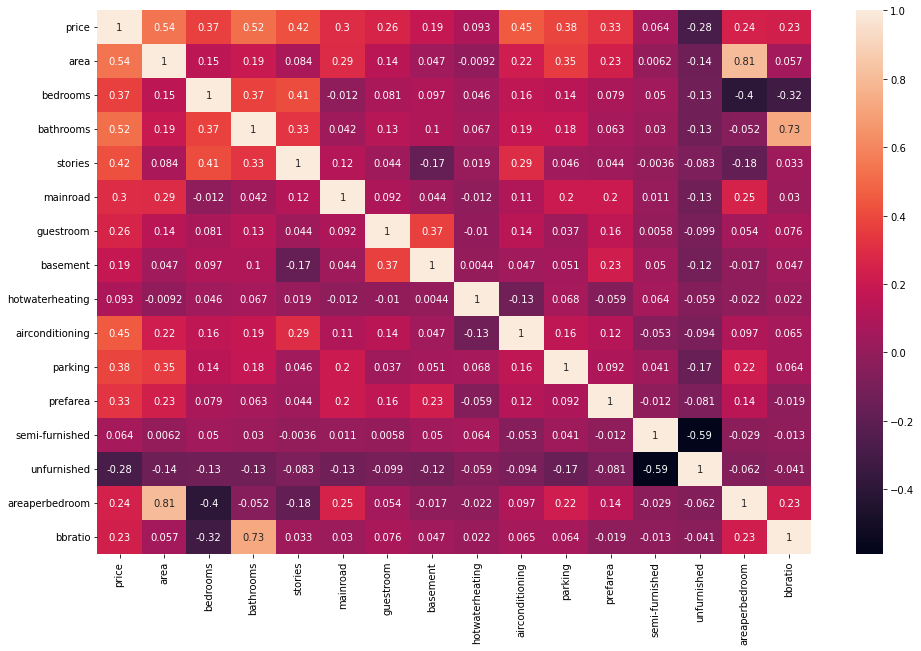

In [ ]:
plt.figure(figsize = (16,10))     
sns.heatmap(df.corr(),annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(input_data):
    # code here
    vif=pd.DataFrame()
    vif["variables"]=input_data.columns
    vif['VIF']=[variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return vif.sort_values(by="VIF", ascending=False)

vif_scores(X)



,variables,VIF
13,areaperbedroom,68.707105
0,area,57.516048
14,bbratio,29.249998
2,bathrooms,11.106354
1,bedrooms,10.683404
4,mainroad,7.910522
3,stories,2.805901
11,semi-furnished,2.614252
12,unfurnished,2.382862
6,basement,2.045854


In [ ]:
vif_scores(X.drop('bbratio',1))

C:\Users\admin\AppData\Local\Temp\ipykernel_5300\824529792.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop('bbratio',1))


,variables,VIF
0,area,20.716025
13,areaperbedroom,18.437262
1,bedrooms,10.026456
4,mainroad,7.459237
3,stories,2.783201
11,semi-furnished,2.484125
12,unfurnished,2.204838
6,basement,2.027730
9,parking,2.004052
8,airconditioning,1.768236


As you can see the vif scores are still high. Lets drop bedroom also as input feature and again check vif scores.


In [ ]:
vif_scores(X.drop(['bbratio','bedrooms'],1))

C:\Users\admin\AppData\Local\Temp\ipykernel_5300\3506128967.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bbratio','bedrooms'],1))


,variables,VIF
0,area,14.978857
12,areaperbedroom,13.881473
3,mainroad,6.099134
2,stories,2.559555
10,semi-furnished,2.037729
8,parking,1.999982
5,basement,1.901473
7,airconditioning,1.762488
11,unfurnished,1.722278
1,bathrooms,1.692180


As you can see the vif scores are still high. Lets drop areaperbedroom which we calculated as input feature and again check vif scores.

Its very natural that both area, bedroom and areaperbedroom will be highly correlated with each other as areaperbedroom is calculated out of area and bedroom.



In [ ]:
vif_scores(X.drop(['bbratio','bedrooms','areaperbedroom'],1))

C:\Users\admin\AppData\Local\Temp\ipykernel_5300\3744430889.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bbratio','bedrooms','areaperbedroom'],1))


,variables,VIF
3,mainroad,5.513523
0,area,4.427217
2,stories,2.323144
10,semi-furnished,2.004738
8,parking,1.987943
5,basement,1.896942
7,airconditioning,1.760737
11,unfurnished,1.652372
1,bathrooms,1.619363
9,prefarea,1.497335


In [ ]:
vif_scores(X.drop(['bbratio','bedrooms','areaperbedroom','semi-furnished'],1))

C:\Users\admin\AppData\Local\Temp\ipykernel_5300\2299088664.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bbratio','bedrooms','areaperbedroom','semi-furnished'],1))


,variables,VIF
3,mainroad,4.845386
0,area,4.362200
2,stories,2.301304
8,parking,1.987700
5,basement,1.860222
7,airconditioning,1.753933
1,bathrooms,1.619286
9,prefarea,1.490106
4,guestroom,1.470984
10,unfurnished,1.341568


In [ ]:
vif_scores(X.drop(['bbratio','bedrooms','areaperbedroom','mainroad','basement'],1))


C:\Users\admin\AppData\Local\Temp\ipykernel_5300\2820508186.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(['bbratio','bedrooms','areaperbedroom','mainroad','basement'],1))


,variables,VIF
0,area,3.581339
2,stories,2.086055
6,parking,1.930839
5,airconditioning,1.750905
8,semi-furnished,1.681399
1,bathrooms,1.585659
7,prefarea,1.410651
9,unfurnished,1.398869
3,guestroom,1.280357
4,hotwaterheating,1.083603


In [ ]:
X = df[['area',  'bathrooms', 'stories',
       'guestroom', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'unfurnished']]

y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)
print(f"Train Data: {X_train.shape},{y_train.shape}")
print(f"Test Data: {X_test.shape},{y_test.shape}")


Train Data: (381, 9),(381,)
Test Data: (164, 9),(164,)


Building our linear model again

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm_2 =  sm.OLS(y_train,X_train).fit()


In [ ]:
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     84.88
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.65e-84
Time:                        20:38:48   Log-Likelihood:                 386.50
No. Observations:                 381   AIC:                            -753.0
Df Residuals:                     371   BIC:                            -713.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0765      0.011     

The main focus is to keep pvalue is less thn 0.05

In [ ]:
y_pred =lm_2.predict(X_test) 
y_pred 

316    0.302090
77     0.476953
360    0.130398
90     0.250494
493    0.128594
         ...   
395    0.147035
425    0.166300
195    0.432600
452    0.329693
154    0.312266
Length: 164, dtype: float64

In [ ]:
X_test.shape

(164, 10)

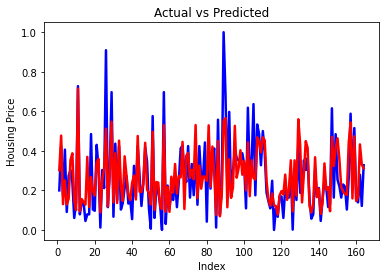

In [ ]:
c = [i for i in range(1,165,1)]
fig = plt.figure()

plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-') 
plt.plot(c,y_pred, color='red', linewidth=2.5, linestyle='-') 

plt.title('Actual vs Predicted') 
plt.xlabel('Index')
plt.ylabel('Housing Price')
                 
                      
plt.show()

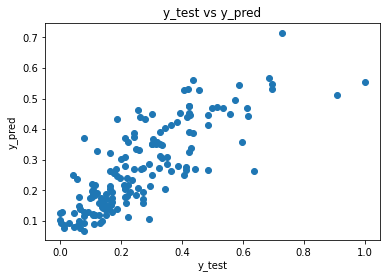

In [ ]:
fig = plt.figure()

plt.scatter(y_test,y_pred)

plt.xlabel('y_test')
plt.ylabel('y_pred')    
plt.title('y_test vs y_pred')
                       
plt.show()

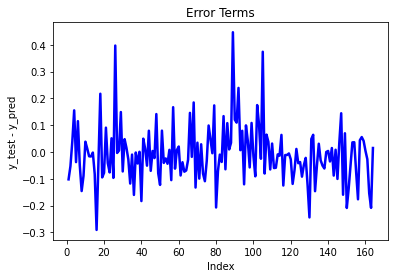

In [ ]:
fig = plt.figure()
c = [i for i in range(1,165,1)]

plt.plot(c,y_test - y_pred, color='blue', linewidth=2.5, linestyle='-')       
plt.title('Error Terms') 
plt.xlabel('Index')
plt.ylabel('y_test - y_pred')
plt.show()
                 

Error is totally random & not violating the assumption

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


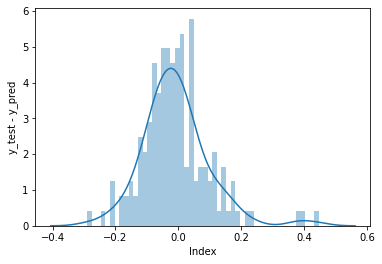

In [ ]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins=50)
plt.xlabel('Index')
plt.ylabel('y_test - y_pred')
plt.show()



In [ ]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"RMSE value: {rmse}")

RMSE value: 0.1065813104056132


In [ ]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse


0.011359575727777672

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

0.07757131230351447

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)
 

[False  True  True  True False False  True  True False False]
[6 1 1 1 4 3 1 1 2 5]


In [ ]:
print(len(X.columns))
col=X_train.columns[rfe.support_]
print(col)

9
Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking'], dtype='object')


As you can see that 5 features got selected out of initial 11 features.


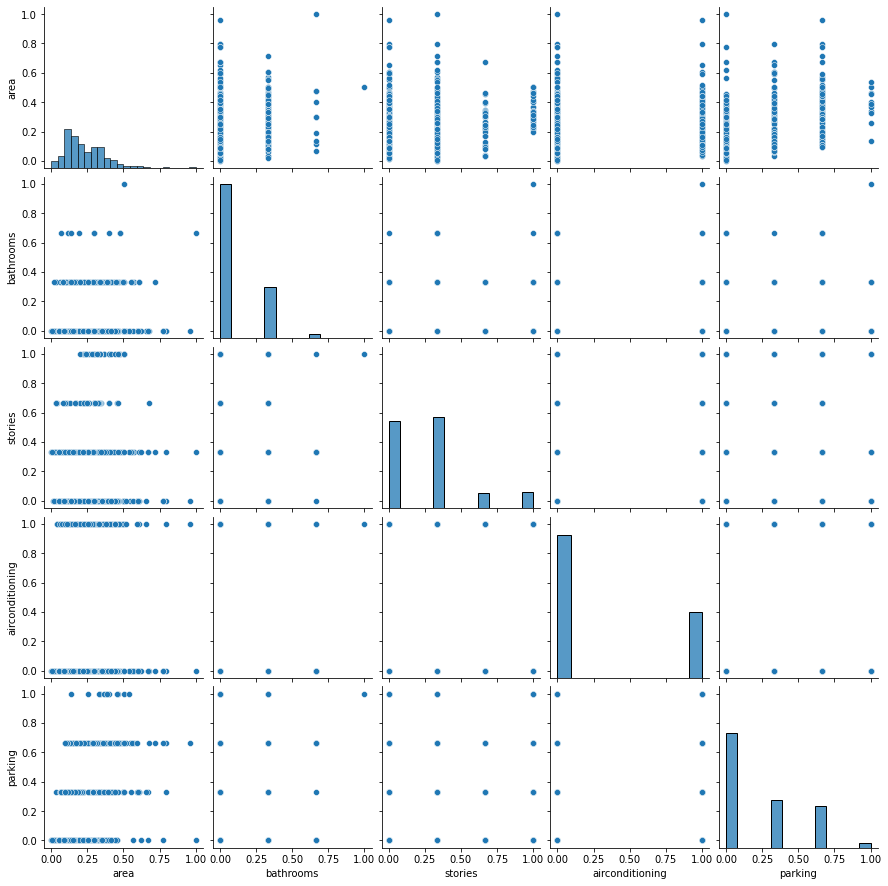

In [ ]:
sns.pairplot(df[col])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


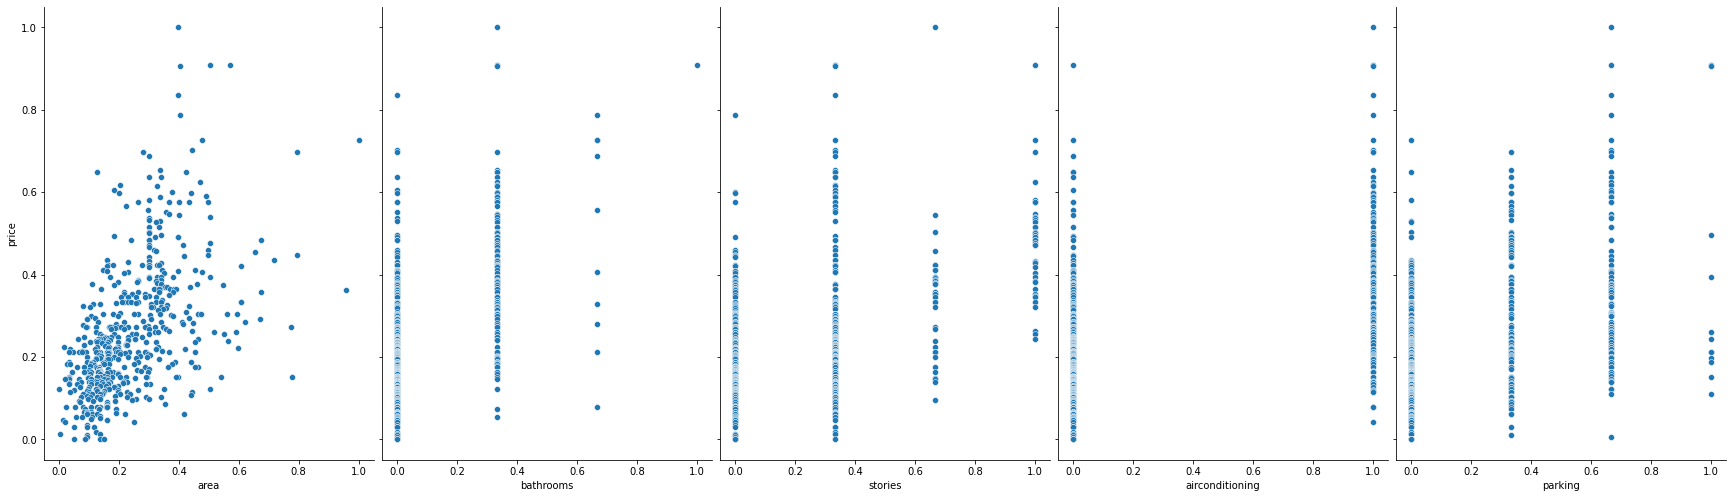

In [ ]:
sns.pairplot(df, x_vars=col, y_vars='price', size=7, aspect=0.7,kind='scatter')

In [ ]:
X_train_rfe = X_train[col] 


In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)


In [ ]:
lm_3 = sm.OLS(y_train,X_train_rfe ).fit()
  

In [ ]:
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     119.0
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.03e-75
Time:                        20:39:09   Log-Likelihood:                 354.50
No. Observations:                 381   AIC:                            -697.0
Df Residuals:                     375   BIC:                            -673.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0723      0.010     

In [ ]:
vif_scores(df[col])


,variables,VIF
0,area,2.568418
2,stories,1.969377
4,parking,1.900270
3,airconditioning,1.686193
1,bathrooms,1.557703


In [ ]:
X_test_rfe = X_test[col]

X_test_rfe = sm.add_constant(X_test_rfe)
y_pred = lm_3.predict(X_test_rfe)


Now again lets evaluate oour third model.



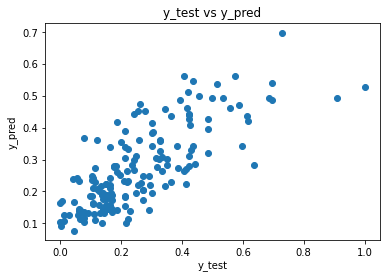

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)

plt.xlabel('y_test')
plt.ylabel('y_pred')    
plt.title('y_test vs y_pred')
                       
plt.show()


In [ ]:
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)

mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)

mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)




0.013616114786620325
0.08950049088382549
0.1166881090198154


In [ ]:
print(lm_1.summary())
print(lm_2.summary())
print(lm_3.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     55.74
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.17e-84
Time:                        20:39:10   Log-Likelihood:                 400.40
No. Observations:                 381   AIC:                            -768.8
Df Residuals:                     365   BIC:                            -705.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1228      0.059     